In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar


In [2]:
data=pd.read_csv("autos.csv",encoding = "latin-1")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,24-03-2016 11:52,Golf_3_1.6,privat,Angebot,480.0,test,NaN,1993.0,manuell,0.0,golf,150000,0.0,benzin,volkswagen,NaN,24-03-2016 00:00,0.0,70435.0,07-04-2016 03:16
1,24-03-2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000,5.0,diesel,audi,ja,24-03-2016 00:00,0.0,66954.0,07-04-2016 01:46
2,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163.0,grand,125000,8.0,diesel,jeep,NaN,14-03-2016 00:00,0.0,90480.0,05-04-2016 12:47
3,17-03-2016 16:54,GOLF_4_1_4__3TÃRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000,6.0,benzin,volkswagen,nein,17-03-2016 00:00,0.0,91074.0,17-03-2016 17:40
4,31-03-2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000,7.0,diesel,skoda,nein,31-03-2016 00:00,0.0,60437.0,06-04-2016 10:17


In [4]:
data.describe()

,price,yearOfRegistration,powerPS,monthOfRegistration,nrOfPictures,postalCode
count,3.715380e+05,371537.000000,371538.000000,371537.000000,371537.0,371537.000000
mean,1.729544e+04,2004.577883,115.548840,5.734473,0.0,50820.666402
std,3.587905e+06,92.865496,192.137238,3.712383,0.0,25799.080292
min,0.000000e+00,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1.150000e+03,1999.000000,70.000000,3.000000,0.0,30459.000000
50%,2.950000e+03,2003.000000,105.000000,6.000000,0.0,49610.000000
75%,7.200000e+03,2008.000000,150.000000,9.000000,0.0,71546.000000
max,2.147484e+09,9999.000000,20000.000000,12.000000,0.0,99998.000000


In [5]:
data.corr()

,price,yearOfRegistration,powerPS,monthOfRegistration,nrOfPictures,postalCode
price,1.000000,-0.000182,0.006850,-0.002826,NaN,-0.003164
yearOfRegistration,-0.000182,1.000000,0.000351,-0.011607,NaN,-0.001653
powerPS,0.006850,0.000351,1.000000,0.044359,NaN,0.027114
monthOfRegistration,-0.002826,-0.011607,0.044359,1.000000,NaN,0.014962
nrOfPictures,NaN,NaN,NaN,NaN,NaN,NaN
postalCode,-0.003164,-0.001653,0.027114,0.014962,NaN,1.000000


In [6]:
#dropping unwanted columns
print(data.seller.unique())
print(data.offerType.unique())
print(data.abtest.unique())
print(data.nrOfPictures.unique())

['privat' 'gewerblich' nan 'golf']
['Angebot' 'Gesuch' nan '150000']
['test' 'control' nan 'benzin']
[ 0. nan]


In [7]:
data.drop(["name","seller","offerType","nrOfPictures","lastSeen","dateCreated","postalCode","dateCrawled"],axis="columns",inplace=True)

In [8]:
data

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480.0,test,NaN,1993.0,manuell,0.0,golf,150000,0.0,benzin,volkswagen,NaN
1,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000,5.0,diesel,audi,ja
2,9800.0,test,suv,2004.0,automatik,163.0,grand,125000,8.0,diesel,jeep,NaN
3,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000,6.0,benzin,volkswagen,nein
4,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000,7.0,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371534,2200.0,test,NaN,2005.0,NaN,0.0,NaN,20000,1.0,NaN,sonstige_autos,NaN
371535,1199.0,test,cabrio,2000.0,automatik,101.0,fortwo,125000,3.0,benzin,smart,nein
371536,9200.0,test,bus,1996.0,manuell,102.0,transporter,150000,3.0,diesel,volkswagen,nein
371537,3400.0,test,kombi,2002.0,manuell,100.0,golf,150000,6.0,diesel,volkswagen,NaN


# Data Cleaning

In [9]:
data_car = data.copy()

# Filter bad data
data_car = data_car[
    (data_car["yearOfRegistration"].between(1945, 2017, inclusive=True)) &
    (data_car["powerPS"].between(100, 500, inclusive=True)) &
    (data_car["price"].between(100, 200000, inclusive=True))] 

In [10]:
#checking for null values
data_car.isnull().any()

price                  False
abtest                 False
vehicleType             True
yearOfRegistration     False
gearbox                 True
powerPS                False
model                   True
kilometer              False
monthOfRegistration    False
fuelType                True
brand                  False
notRepairedDamage       True
dtype: bool

In [11]:
data_car.isnull().sum()

price                      0
abtest                     0
vehicleType             9739
yearOfRegistration         0
gearbox                 2603
powerPS                    0
model                   7613
kilometer                  0
monthOfRegistration        0
fuelType               10398
brand                      0
notRepairedDamage      26279
dtype: int64

In [12]:
data_car["gearbox"].value_counts()

manuell      144789
automatik     61928
Name: gearbox, dtype: int64

In [13]:
data_car['gearbox'].fillna(value='manuell', inplace=True)

In [14]:
data_car["gearbox"].isnull().sum()

0

In [15]:
data_car["notRepairedDamage"].value_counts()

nein    165570
ja       17471
Name: notRepairedDamage, dtype: int64

In [16]:
data_car["notRepairedDamage"].isnull().sum()

26279

In [17]:
data_car["notRepairedDamage"].fillna("nein",inplace = True)

In [18]:
data_car["notRepairedDamage"].isnull().sum()


0

In [19]:
data_car["fuelType"].value_counts()

benzin     111260
diesel      83184
lpg          4048
cng           262
hybrid        113
andere         36
elektro        19
Name: fuelType, dtype: int64

In [20]:
data_car["fuelType"].fillna("benzin",inplace = True)

In [21]:
data_car.isnull().sum()

price                     0
abtest                    0
vehicleType            9739
yearOfRegistration        0
gearbox                   0
powerPS                   0
model                  7613
kilometer                 0
monthOfRegistration       0
fuelType                  0
brand                     0
notRepairedDamage         0
dtype: int64

In [22]:
data_car["vehicleType"].value_counts()

limousine     68924
kombi         54258
bus           21810
cabrio        16977
coupe         15304
suv           12499
kleinwagen     8483
andere         1326
Name: vehicleType, dtype: int64

In [23]:
#we can fill according to fueltype values
data_car.groupby("fuelType")["vehicleType"].value_counts()

fuelType  vehicleType
andere    limousine          9
          kombi              8
          andere             4
          bus                4
          suv                4
          cabrio             2
          kleinwagen         2
          coupe              1
benzin    limousine      44398
          kombi          22911
          cabrio         15226
          coupe          12520
          bus             7413
          kleinwagen      6806
          suv             4072
          andere           710
cng       bus              118
          kombi             94
          limousine         25
          andere             7
          kleinwagen         3
          cabrio             1
          coupe              1
          suv                1
diesel    kombi          30254
          limousine      23032
          bus            13834
          suv             7860
          coupe           2484
          kleinwagen      1604
          cabrio          1552
          andere 

In [24]:
data_car["vehicleType"].fillna("blank",inplace = True)

In [25]:
data_car["vehicleType"].isnull().sum()


0

In [26]:
len(data_car["model"].unique())

234

In [27]:
data_car["model"].value_counts()

3er                18142
andere             15260
golf               14643
a4                  9156
passat              8401
                   ...  
up                     1
discovery_sport        1
agila                  1
justy                  1
sandero                1
Name: model, Length: 233, dtype: int64

In [28]:
data_car["model"].fillna("3er",inplace =True)

In [29]:
data_car.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300.0,test,coupe,2011.0,manuell,190.0,3er,125000,5.0,diesel,audi,ja
2,9800.0,test,suv,2004.0,automatik,163.0,grand,125000,8.0,diesel,jeep,nein
5,650.0,test,limousine,1995.0,manuell,102.0,3er,150000,10.0,benzin,bmw,ja
6,2200.0,test,cabrio,2004.0,manuell,109.0,2_reihe,150000,8.0,benzin,peugeot,nein
8,14500.0,control,bus,2014.0,manuell,125.0,c_max,30000,8.0,benzin,ford,nein


In [30]:
data_car.describe()

,price,yearOfRegistration,powerPS,monthOfRegistration
count,209320.000000,209320.000000,209320.000000,209320.000000
mean,8021.273634,2004.254066,154.336413,6.091577
std,9292.760052,6.508539,54.410931,3.550213
min,100.000000,1947.000000,100.000000,0.000000
25%,2290.000000,2000.000000,116.000000,3.000000
50%,5142.500000,2005.000000,140.000000,6.000000
75%,10600.000000,2009.000000,174.000000,9.000000
max,200000.000000,2017.000000,500.000000,12.000000


In [31]:

#checking for null values again in our data
data_car.isnull().sum()

price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

# Data Vizualization

abtest
test       108140
control    101180
Name: abtest, dtype: int64


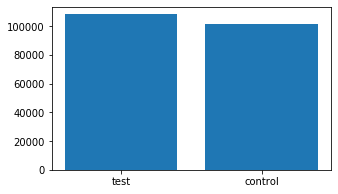

vehicleType
limousine    68924
kombi        54258
bus          21810
cabrio       16977
coupe        15304
Name: vehicleType, dtype: int64


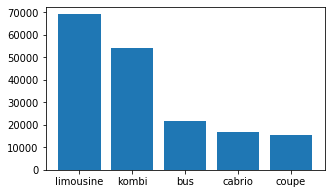

brand
volkswagen       38221
bmw              35623
audi             27807
mercedes_benz    27509
opel             17340
Name: brand, dtype: int64


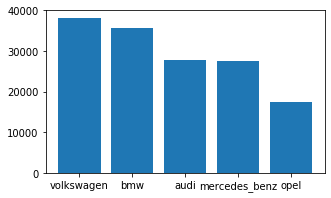

model
3er       25755
andere    15260
golf      14643
a4         9156
passat     8401
Name: model, dtype: int64


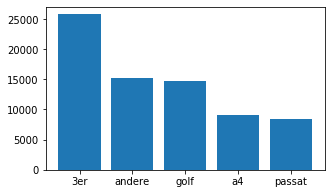

gearbox
manuell      147392
automatik     61928
Name: gearbox, dtype: int64


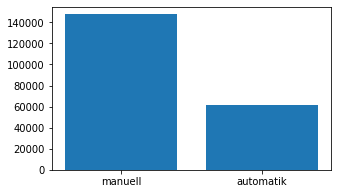

fuelType
benzin    121658
diesel     83184
lpg         4048
cng          262
hybrid       113
Name: fuelType, dtype: int64


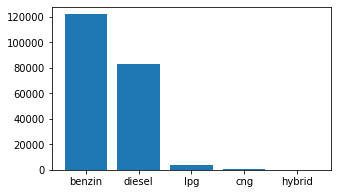

notRepairedDamage
nein    191849
ja       17471
Name: notRepairedDamage, dtype: int64


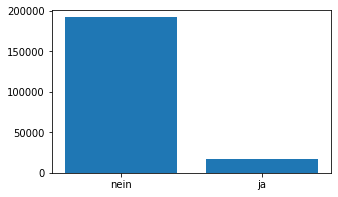

In [32]:
cat_val = ["abtest","vehicleType", "brand", "model", "gearbox","fuelType", "notRepairedDamage"]

for i,col in enumerate(cat_val):
    v=data_car[col].unique()
    g = data_car.groupby(by=col)[col].count().sort_values(ascending=False)
    r=range(min(len(v),5))
    print(g.head())
    plt.figure(figsize=(5,3))
    plt.bar(r,g.head())
    plt.xticks(r, g.index)
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002025C7F87C8>,
      dtype=object)

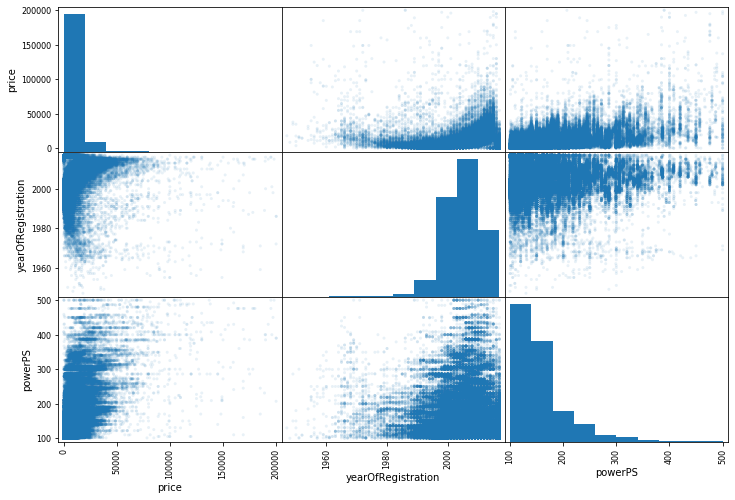

In [33]:
from pandas.plotting import scatter_matrix
num_attributes = ["price", "yearOfRegistration", "powerPS", "kilometer"]
%matplotlib inline
pd.plotting.scatter_matrix(data_car[num_attributes], figsize = (12,8), alpha = 0.1)

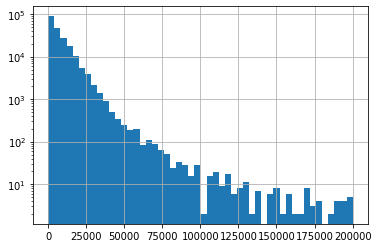

In [34]:
data_car["price"].hist(bins = 50, log = True)

In [35]:

data_car.corr()

,price,yearOfRegistration,powerPS,monthOfRegistration
price,1.000000,0.377914,0.518032,0.035781
yearOfRegistration,0.377914,1.000000,0.092989,0.029023
powerPS,0.518032,0.092989,1.000000,0.025107
monthOfRegistration,0.035781,0.029023,0.025107,1.000000


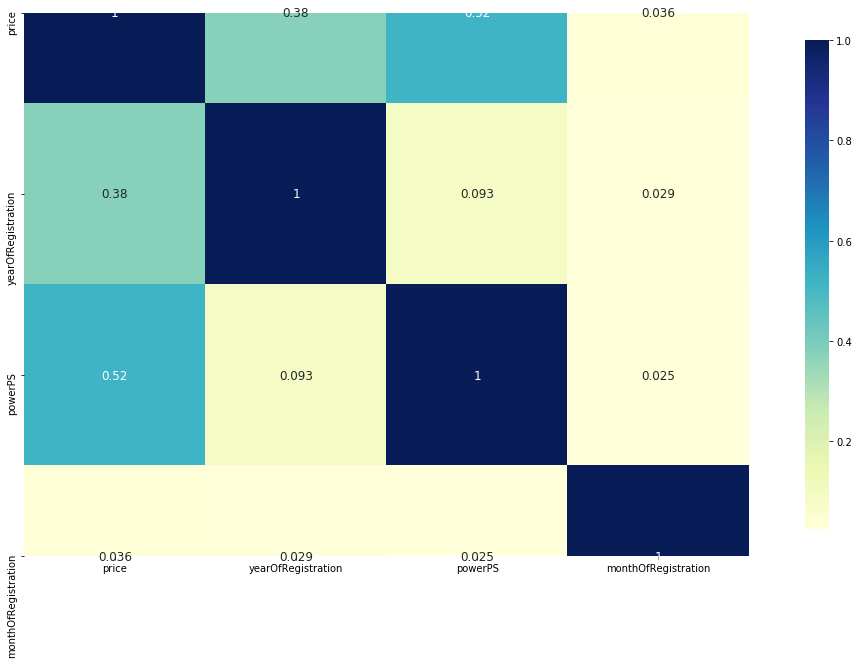

In [36]:
def plot_correlation_map( df ):
    corr = data_car.corr()
    _ , ax = plt.subplots( figsize =( 20 , 10 ) )
    #cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = "YlGnBu",
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
plot_correlation_map(cat_val)


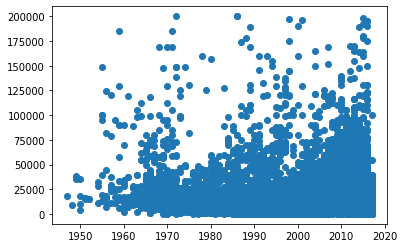

In [37]:
plt.scatter(data_car['yearOfRegistration'],data_car['price'])


# Encoding categorical values

In [38]:
data_car.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300.0,test,coupe,2011.0,manuell,190.0,3er,125000,5.0,diesel,audi,ja
2,9800.0,test,suv,2004.0,automatik,163.0,grand,125000,8.0,diesel,jeep,nein
5,650.0,test,limousine,1995.0,manuell,102.0,3er,150000,10.0,benzin,bmw,ja
6,2200.0,test,cabrio,2004.0,manuell,109.0,2_reihe,150000,8.0,benzin,peugeot,nein
8,14500.0,control,bus,2014.0,manuell,125.0,c_max,30000,8.0,benzin,ford,nein


In [39]:
data_car.dtypes

price                  float64
abtest                  object
vehicleType             object
yearOfRegistration     float64
gearbox                 object
powerPS                float64
model                   object
kilometer               object
monthOfRegistration    float64
fuelType                object
brand                   object
notRepairedDamage       object
dtype: object

In [40]:
from sklearn.preprocessing import LabelEncoder
category_col=["abtest","vehicleType","fuelType","gearbox","notRepairedDamage","brand","model"]
mapping_dict ={} 
labelEncoder=LabelEncoder()
for col in category_col: 
    data_car[col] = labelEncoder.fit_transform(data_car[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict) 

{'abtest': {'control': 0, 'test': 1}, 'vehicleType': {'andere': 0, 'blank': 1, 'bus': 2, 'cabrio': 3, 'coupe': 4, 'kleinwagen': 5, 'kombi': 6, 'limousine': 7, 'suv': 8}, 'fuelType': {'andere': 0, 'benzin': 1, 'cng': 2, 'diesel': 3, 'elektro': 4, 'hybrid': 5, 'lpg': 6}, 'gearbox': {'automatik': 0, 'manuell': 1}, 'notRepairedDamage': {'ja': 0, 'nein': 1}, 'brand': {'alfa_romeo': 0, 'audi': 1, 'bmw': 2, 'chevrolet': 3, 'chrysler': 4, 'citroen': 5, 'dacia': 6, 'daewoo': 7, 'daihatsu': 8, 'fiat': 9, 'ford': 10, 'honda': 11, 'hyundai': 12, 'jaguar': 13, 'jeep': 14, 'kia': 15, 'lada': 16, 'lancia': 17, 'land_rover': 18, 'mazda': 19, 'mercedes_benz': 20, 'mini': 21, 'mitsubishi': 22, 'nissan': 23, 'opel': 24, 'peugeot': 25, 'porsche': 26, 'renault': 27, 'rover': 28, 'saab': 29, 'seat': 30, 'skoda': 31, 'smart': 32, 'sonstige_autos': 33, 'subaru': 34, 'suzuki': 35, 'toyota': 36, 'trabant': 37, 'volkswagen': 38, 'volvo': 39}, 'model': {'100': 0, '145': 1, '147': 2, '156': 3, '159': 4, '1_reihe':

In [41]:
data_car.head()

,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
1,18300.0,1,4,2011.0,1,190.0,11,125000,5.0,3,1,0
2,9800.0,1,8,2004.0,0,163.0,114,125000,8.0,3,14,1
5,650.0,1,7,1995.0,1,102.0,11,150000,10.0,1,2,0
6,2200.0,1,3,2004.0,1,109.0,8,150000,8.0,1,25,1
8,14500.0,0,2,2014.0,1,125.0,58,30000,8.0,1,10,1


# model building

In [42]:
#splitting dependent and independent varibles
x=data_car.iloc[:,1:].values
x

array([[1, 4, 2011.0, ..., 3, 1, 0],
       [1, 8, 2004.0, ..., 3, 14, 1],
       [1, 7, 1995.0, ..., 1, 2, 0],
       ...,
       [1, 2, 1996.0, ..., 3, 38, 1],
       [1, 6, 2002.0, ..., 3, 38, 1],
       [0, 7, 2013.0, ..., 1, 2, 1]], dtype=object)

In [43]:
y=data_car.iloc[:,0:1].values
y

array([[18300.],
       [ 9800.],
       [  650.],
       ...,
       [ 9200.],
       [ 3400.],
       [28990.]])

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.96728434, -0.6463322 ,  1.0364769 , ...,  0.97557459,
        -1.22291545, -3.31375875],
       [ 0.96728434,  1.29575632, -0.03903582, ...,  0.97557459,
        -0.28513236,  0.30177212],
       [ 0.96728434,  0.81023419, -1.42183788, ..., -0.79018349,
        -1.15077829, -3.31375875],
       ...,
       [ 0.96728434, -1.61737645, -1.26819321, ...,  0.97557459,
         1.4461595 ,  0.30177212],
       [ 0.96728434,  0.32471206, -0.34632517, ...,  0.97557459,
         1.4461595 ,  0.30177212],
       [-1.03382218,  0.81023419,  1.34376625, ..., -0.79018349,
        -1.15077829,  0.30177212]])

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [46]:
from sklearn.linear_model import LinearRegression
mr=LinearRegression()
mr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
y_pred_mr=mr.predict(x_test)
y_pred_mr

array([[1795.17237764],
       [6112.40648581],
       [2066.68109395],
       ...,
       [9888.50845846],
       [3602.09249564],
       [-503.17647556]])

In [48]:
y_test

array([[ 1899.],
       [ 2999.],
       [ 2500.],
       ...,
       [13700.],
       [ 6500.],
       [  777.]])

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_mr)

0.5307914014753722

In [50]:
y_test[10:15]

array([[19200.],
       [13790.],
       [27000.],
       [ 2500.],
       [11000.]])

In [51]:
y_pred_mr[10:15]

array([[21369.21989188],
       [13715.30538193],
       [24656.71370882],
       [ 4334.16188527],
       [ 6353.82694699]])

In [60]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(criterion='mse',random_state=0) #mse is mean square error
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)

tree_rmse = np.sqrt(y_pred_dt)
tree_rmse
r2_score(y_test,y_pred_dt)

0.7352185320345157

In [53]:
y_test[5:8]

array([[10400.],
       [ 1700.],
       [19900.]])

In [54]:
y_pred_dt[5:8]

array([15699.,  1500., 15290.])

In [55]:
#import library for random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=42, n_jobs =-1, max_depth = 30)
#n_estimators no of decision trees

y_pred_rf=dt.predict(x_test)
r2_score(y_test,y_pred_rf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.7352185320345157

In [58]:
from joblib import dump
dump(rf,"rf.save")

['rf.save']